What proportion of Wikipedia historical articles include a link to a historical figure?

To answer this, ten random Wikipedia articles were sampled ten different times (100 articles total). For each sample, the proportion of articles exceeding 710 words and the mean word count were recorded.

In [ ]:
import time
import pandas as pd

Sample 1 complete: proportion over 710 words = 0.1400
Sample 2 complete: proportion over 710 words = 0.1400
Sample 3 complete: proportion over 710 words = 0.1200
Sample 4 complete: proportion over 710 words = 0.1400
Sample 5 complete: proportion over 710 words = 0.1600
Sample 6 complete: proportion over 710 words = 0.1600
Sample 7 complete: proportion over 710 words = 0.2200
Sample 8 complete: proportion over 710 words = 0.1400
Sample 9 complete: proportion over 710 words = 0.1200
Sample 10 complete: proportion over 710 words = 0.1400

Sample Proportions Summary:
   sample_number  proportion_over_710  sample_mean_wordcount
0            1.0                 0.14                 372.56
1            2.0                 0.14                 386.66
2            3.0                 0.12                 412.62
3            4.0                 0.14                 447.10
4            5.0                 0.16                 427.78
5            6.0                 0.16                 683.36
6  

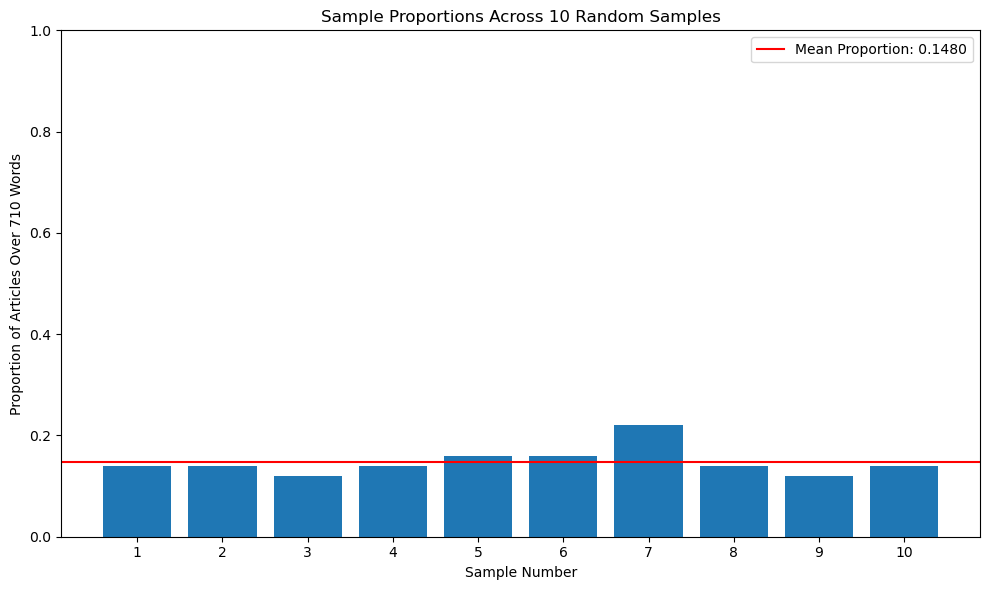

In [5]:
# Wikipedia Random-Article Sampling Using the Action API
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wikipedia API endpoint
url = "https://en.wikipedia.org/w/api.php"
headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}

# Function: fetch a random article title
def fetch_random_article_title():
    params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,  # only mainspace articles
        "rnlimit": 1,
        "format": "json"
    }
    r = requests.get(url, params=params, headers=headers)
    data = r.json()
    return data['query']['random'][0]['title']

# Function: fetch the plain-text content of an article
def fetch_article_content(title):
    params = {
        "action": "query",
        "titles": title,
        "prop": "extracts",
        "explaintext": True,
        "format": "json"
    }
    r = requests.get(url, params=params, headers=headers)
    pages = r.json()['query']['pages']
    page_id = list(pages.keys())[0]
    return pages[page_id].get('extract', '')

# Determine whether article exceeds 710 words
def is_over_710_words(text):
    return len(text.split()) > 710

# Number of samples and sample size
num_samples = 10
sample_size = 50

# Create a dataframe to store sample proportions
sample_results = pd.DataFrame(columns=['sample_number', 'proportion_over_710', 'sample_mean_wordcount'])

# Collect multiple samples
for sample_num in range(1, num_samples + 1):
    print(f"Collecting sample {sample_num} of {num_samples}...")
    
    # Collect a sample of articles
    records = []
    for i in range(sample_size):
        title = fetch_random_article_title()
        content = fetch_article_content(title)
        word_count = len(content.split())
        over_710 = is_over_710_words(content)
        records.append({
            "title": title,
            "word_count": word_count,
            "over_710": over_710
        })
        time.sleep(0.1)  # Be nice to Wikipedia's servers
    
    # Convert to DataFrame for this sample
    sample_df = pd.DataFrame(records)
    
    # Calculate proportion and mean for this sample
    proportion = sample_df["over_710"].mean()
    mean_wordcount = sample_df["word_count"].mean()
    
    # Add to results dataframe
    sample_results.loc[sample_num-1] = [sample_num, proportion, mean_wordcount]
    
    print(f"Sample {sample_num} complete: proportion over 710 words = {proportion:.4f}")

# Display the results
print("\nSample Proportions Summary:")
print(sample_results)

# Calculate overall statistics
overall_mean_proportion = sample_results['proportion_over_710'].mean()
overall_std_proportion = sample_results['proportion_over_710'].std()
overall_mean_wordcount = sample_results['sample_mean_wordcount'].mean()

print(f"\nMean proportion across all samples: {overall_mean_proportion:.4f}")
print(f"Standard deviation of proportions: {overall_std_proportion:.4f}")
print(f"Mean word count across all samples: {overall_mean_wordcount:.1f}")

# Create a visualization of the sample proportions
plt.figure(figsize=(10, 6))
plt.bar(sample_results['sample_number'], sample_results['proportion_over_710'])
plt.axhline(y=overall_mean_proportion, color='r', linestyle='-', label=f'Mean Proportion: {overall_mean_proportion:.4f}')
plt.xlabel('Sample Number')
plt.ylabel('Proportion of Articles Over 710 Words')
plt.title('Sample Proportions Across 10 Random Samples')
plt.xticks(sample_results['sample_number'])
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Mean proportion across all samples: 0.1480
# Standard deviation of proportions: 0.0286 (Thus, the estimate of 14.8% has an uncertainty of only ±2.0 percentage points.)
# Mean word count across all samples: 468.2
# 95% Confidence interval for mean word count (402.07, 534.33)
# 95% Confidence interval for proportion over 710 words (0.1276, 0.1685)

Based on the 10 samples of randomly selected Wikipedia articles, we estimate that between 12.8% and 16.9% of all Wikipedia articles exceed 710 words. (95% Confidence interval)

reasonably normal